# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
#debugging only
# cities = cities[0:10]
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create query url to scan API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

In [5]:
#list for analysis parameters
city_name = []
city_lat = []
city_lng = []
city_country =[]
city_date =[]
city_temp = []
city_humidity = []
city_cloud_cover = []
city_wind_speed = []

In [6]:
print("Retrieving Desired City Data")
print(f"----------------------------------")
records = 0
records_set = 1

#for loop to go through each city from the API with try/except block so code doesn't break
for city in cities:
    city_url = f"{query_url}{city}"
    records = records + 1
    try:
        response = requests.get(city_url).json()
        time.sleep(0.5)
        print(f"Processing city number {records}")
        print(response)
        print()
        print()
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloud_cover.append(response["clouds"]["all"])
        city_wind_speed.append(response["wind"]["speed"])
        
        #Conditional for group city outputs 
        if records > 50:
            records_set += 1
            records = 1
    except:
        print(f"City not found")

print(f"----------------------------------")
print(f"End of Data Retrieval Process")
print(f"----------------------------------")

Retrieving Desired City Data
----------------------------------
Processing city number 1
{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 97.03, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1008, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1613188378, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1613167839, 'sunset': 1613214535}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}


Processing city number 2
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 3
{'coord': {'lon': 26.25, 'lat': 35.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 52.81, 'temp_min': 55, 'temp_max': 55, 'pressure': 1017, 'humidity': 70}, 'vi

Processing city number 17
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9, 'feels_like': 0.32, 'temp_min': 7, 'temp_max': 12, 'pressure': 1025, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 3.96, 'deg': 329}, 'clouds': {'all': 74}, 'dt': 1613188390, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1613131000, 'sunset': 1613168623}, 'timezone': -18000, 'id': 5106841, 'name': 'Albany', 'cod': 200}


Processing city number 18
{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.99, 'feels_like': 79.93, 'temp_min': 73.99, 'temp_max': 73.99, 'pressure': 1006, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 340, 'gust': 13}, 'clouds': {'all': 83}, 'dt': 1613188390, 'sys': {'type': 3, 'id': 2011314, 'countr

Processing city number 33
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 34
{'coord': {'lon': 29.8333, 'lat': 9.2333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.7, 'feels_like': 64.35, 'temp_min': 70.7, 'temp_max': 70.7, 'pressure': 1009, 'humidity': 25, 'sea_level': 1009, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 24}, 'clouds': {'all': 1}, 'dt': 1613188401, 'sys': {'country': 'SS', 'sunrise': 1613190021, 'sunset': 1613232577}, 'timezone': 7200, 'id': 377472, 'name': 'Bentiu', 'cod': 200}


Processing city number 35
{'coord': {'lon': 168.8643, 'lat': -46.1927}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 68.02, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1013, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 

Processing city number 50
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.57, 'feels_like': 66.51, 'temp_min': 72.57, 'temp_max': 72.57, 'pressure': 1014, 'humidity': 61, 'sea_level': 1014, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 15.52, 'deg': 71}, 'clouds': {'all': 0}, 'dt': 1613188413, 'sys': {'country': 'CV', 'sunrise': 1613203388, 'sunset': 1613245287}, 'timezone': -3600, 'id': 3374210, 'name': 'São Filipe', 'cod': 200}


Processing city number 51
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 50.81, 'feels_like': 46.18, 'temp_min': 44.01, 'temp_max': 55, 'pressure': 1024, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 30, 'gust': 5.01}, 'clouds': {'all': 27}, 'dt': 1613188413, 'sys': {'type': 3,

Processing city number 17
{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 84.6, 'temp_min': 86, 'temp_max': 86, 'pressure': 1009, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 90}, 'clouds': {'all': 64}, 'dt': 1613188425, 'sys': {'type': 1, 'id': 9498, 'country': 'AU', 'sunrise': 1613159559, 'sunset': 1613205744}, 'timezone': 36000, 'id': 2159220, 'name': 'Mackay', 'cod': 200}


Processing city number 18
{'coord': {'lon': -7.7169, 'lat': 4.375}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.82, 'feels_like': 85.91, 'temp_min': 78.82, 'temp_max': 78.82, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 236}, 'clouds': {'all': 0}, 'dt': 1613188425, 'sys': {'country': 'LR', 's

Processing city number 32
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.5, 'feels_like': 72.97, 'temp_min': 69.01, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 110}, 'rain': {'1h': 0.17}, 'clouds': {'all': 0}, 'dt': 1613188435, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1613181977, 'sunset': 1613228173}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}


Processing city number 33
{'coord': {'lon': -86.7133, 'lat': 36.3231}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.99, 'feels_like': 22.71, 'temp_min': 28.99, 'temp_max': 28.99, 'pressure': 1025, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 11, 'gust': 5.01}, 'clouds': {'all': 100}, 'dt': 1613188436, 'sys': 

Processing city number 48
{'coord': {'lon': -131.6461, 'lat': 55.3422}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.52, 'feels_like': 18.32, 'temp_min': 33.8, 'temp_max': 35.6, 'pressure': 1011, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 110, 'gust': 24.16}, 'clouds': {'all': 1}, 'dt': 1613188447, 'sys': {'type': 1, 'id': 7741, 'country': 'US', 'sunrise': 1613146549, 'sunset': 1613180760}, 'timezone': -32400, 'id': 5554428, 'name': 'Ketchikan', 'cod': 200}


Processing city number 49
{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.99, 'feels_like': 81.84, 'temp_min': 73.99, 'temp_max': 73.99, 'pressure': 1007, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 233, 'gust': 1.99}, 'clouds': {'all': 99}, 'dt': 1613188327, 'sys': {'type

Processing city number 15
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 85.46, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1010, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 267, 'gust': 4}, 'rain': {'1h': 0.15}, 'clouds': {'all': 94}, 'dt': 1613188320, 'sys': {'type': 3, 'id': 2005652, 'country': 'EC', 'sunrise': 1613131896, 'sunset': 1613175591}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}


Processing city number 16
{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 68.02, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1013, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 157, 'gust': 8.99}, 'clouds': {'all': 53}, 'dt': 1613

Processing city number 31
{'coord': {'lon': 77.9838, 'lat': 45.2514}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.48, 'feels_like': 17.37, 'temp_min': 27.48, 'temp_max': 27.48, 'pressure': 1027, 'humidity': 98, 'sea_level': 1027, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 10.42, 'deg': 51}, 'clouds': {'all': 100}, 'dt': 1613188470, 'sys': {'country': 'KZ', 'sunrise': 1613181171, 'sunset': 1613218315}, 'timezone': 21600, 'id': 1517637, 'name': 'Ushtobe', 'cod': 200}


Processing city number 32
{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -17.86, 'feels_like': -25.78, 'temp_min': -17.86, 'temp_max': -17.86, 'pressure': 1034, 'humidity': 78, 'sea_level': 1034, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 292}, 'clouds': {'all': 97}, '

Processing city number 47
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -2.38, 'feels_like': -12.17, 'temp_min': -2.38, 'temp_max': -2.38, 'pressure': 1013, 'humidity': 70, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 52}, 'clouds': {'all': 0}, 'dt': 1613188482, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}


Processing city number 48
{'coord': {'lon': -110.1667, 'lat': 27.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59.14, 'feels_like': 56.01, 'temp_min': 59.14, 'temp_max': 59.14, 'pressure': 1011, 'humidity': 62, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.96, 'deg': 212}, 'clouds': {'all': 51}, 'dt': 1613188483, 'sys': {'

Processing city number 13
{'coord': {'lon': -23.7142, 'lat': 64.8945}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 39.99, 'feels_like': 21.49, 'temp_min': 39.99, 'temp_max': 39.99, 'pressure': 1009, 'humidity': 72, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 26.42, 'deg': 93}, 'rain': {'1h': 0.115}, 'clouds': {'all': 100}, 'dt': 1613188494, 'sys': {'country': 'IS', 'sunrise': 1613209247, 'sunset': 1613239053}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}


Processing city number 14
{'coord': {'lon': 164.0167, 'lat': -20.2333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.1, 'feels_like': 83.43, 'temp_min': 81.1, 'temp_max': 81.1, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 37}, 'clouds': {'all': 

Processing city number 30
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -21.68, 'feels_like': -28.88, 'temp_min': -21.68, 'temp_max': -21.68, 'pressure': 1036, 'humidity': 81, 'sea_level': 1036, 'grnd_level': 1036}, 'visibility': 10000, 'wind': {'speed': 0.43, 'deg': 263}, 'clouds': {'all': 0}, 'dt': 1613188505, 'sys': {'country': 'RU', 'sunrise': 1613166542, 'sunset': 1613192953}, 'timezone': 39600, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}


Processing city number 31
{'coord': {'lon': 37.8879, 'lat': 51.1537}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.4, 'feels_like': -7.91, 'temp_min': 8.4, 'temp_max': 8.4, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 18.32, 'deg': 225}, 'clouds': {'all': 100}, 'dt': 16131885

Processing city number 47
{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.8, 'feels_like': -29.9, 'temp_min': -19.8, 'temp_max': -19.8, 'pressure': 1033, 'humidity': 84, 'sea_level': 1033, 'grnd_level': 1032}, 'visibility': 6535, 'wind': {'speed': 5.66, 'deg': 264}, 'clouds': {'all': 100}, 'dt': 1613188518, 'sys': {'country': 'RU', 'sunrise': 1613162777, 'sunset': 1613188501}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}


Processing city number 48
{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.69, 'feels_like': 44.08, 'temp_min': 44.01, 'temp_max': 55, 'pressure': 1016, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1613188518, 'sys': {'type': 1, 'id': 

Processing city number 12
{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.94, 'feels_like': 80.53, 'temp_min': 75, 'temp_max': 77, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1613188528, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1613205109, 'sunset': 1613251149}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}


Processing city number 13
{'coord': {'lon': 146.2667, 'lat': -20.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.17, 'feels_like': 91.9, 'temp_min': 89.17, 'temp_max': 89.17, 'pressure': 1007, 'humidity': 42, 'sea_level': 1007, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 3.06, 'deg': 37}, 'clouds': {'all': 56}, 'dt': 1613188529, 'sys': {'countr

Processing city number 28
{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 62.98, 'feels_like': 61.63, 'temp_min': 62.98, 'temp_max': 62.98, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 7.78, 'deg': 329}, 'clouds': {'all': 26}, 'dt': 1613188540, 'sys': {'country': 'NA', 'sunrise': 1613191355, 'sunset': 1613238287}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}


Processing city number 29
{'coord': {'lon': 159.2333, 'lat': 61.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -0.42, 'feels_like': -9.49, 'temp_min': -0.42, 'temp_max': -0.42, 'pressure': 1024, 'humidity': 80, 'sea_level': 1024, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.59, 'deg': 22}, 'clouds': {'all': 0}, 'dt': 1613

Processing city number 44
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.23, 'feels_like': 48.06, 'temp_min': 48.2, 'temp_max': 51.01, 'pressure': 1017, 'humidity': 100}, 'visibility': 4828, 'wind': {'speed': 4.14, 'deg': 195}, 'clouds': {'all': 90}, 'dt': 1613188552, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise': 1613142833, 'sunset': 1613180881}, 'timezone': -28800, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}


Processing city number 45
{'coord': {'lon': -52.3333, 'lat': 4.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 86.61, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1613188552, 'sys': {'type': 1, 'id': 8669, 'country': 'GF', 

Processing city number 11
{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 3.65, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1002, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1613188563, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1613217595, 'sunset': 1613243850}, 'timezone': -10800, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}


Processing city number 12
{'coord': {'lon': 2.6036, 'lat': 6.4965}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 79.86, 'feels_like': 86.9, 'temp_min': 79.86, 'temp_max': 79.86, 'pressure': 1007, 'humidity': 88, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 228}, 'clouds': {'all': 39}, 'dt': 1613188275, 'sys':

Processing city number 26
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 27
{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -14.8, 'feels_like': -23.6, 'temp_min': -14.8, 'temp_max': -14.8, 'pressure': 1029, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1613188576, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1613147879, 'sunset': 1613177120}, 'timezone': -25200, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}


Processing city number 28
{'coord': {'lon': -46.1653, 'lat': -22.2742}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 73.11, 'temp_min': 68, 'temp_max': 68, 'pressure': 1017, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 275}, 

Processing city number 43
{'coord': {'lon': -149.8667, 'lat': -17.5667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 76.89, 'temp_min': 80.01, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 60}, 'rain': {'1h': 0.19}, 'clouds': {'all': 75}, 'dt': 1613188587, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1613145167, 'sunset': 1613190888}, 'timezone': -36000, 'id': 4034438, 'name': 'Haapiti', 'cod': 200}


Processing city number 44
{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 15.3, 'temp_min': 41, 'temp_max': 41, 'pressure': 1005, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 40.29, 'deg': 110, 'gust': 54.09}, 'rain': {'1h': 0.38}, 'clouds': {'all': 75}, 'dt': 1613188588,

Processing city number 8
{'coord': {'lon': -73.1167, 'lat': -36.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 58.01, 'temp_min': 59, 'temp_max': 59, 'pressure': 1014, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1613188599, 'sys': {'type': 1, 'id': 8499, 'country': 'CL', 'sunrise': 1613211726, 'sunset': 1613260288}, 'timezone': -10800, 'id': 3870282, 'name': 'Talcahuano', 'cod': 200}


Processing city number 9
{'coord': {'lon': 96.1667, 'lat': 27.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.56, 'feels_like': 73.65, 'temp_min': 79.56, 'temp_max': 79.56, 'pressure': 1018, 'humidity': 17, 'sea_level': 1018, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 231}, 'clouds': {'all': 27}, 'dt': 1613188600, 'sys': 

Processing city number 23
{'coord': {'lon': -38.2147, 'lat': -9.4061}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.82, 'feels_like': 74.12, 'temp_min': 72.82, 'temp_max': 72.82, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 8.1, 'deg': 131}, 'clouds': {'all': 31}, 'dt': 1613188610, 'sys': {'country': 'BR', 'sunrise': 1613205286, 'sunset': 1613249975}, 'timezone': -10800, 'id': 3392734, 'name': 'Paulo Afonso', 'cod': 200}


Processing city number 24
{'coord': {'lon': -34.9075, 'lat': -7.2597}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 82.44, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1012, 'humidity': 100}, 'visibility': 4000, 'wind': {'speed': 5.75, 'deg': 150}, 'rain': {'1h': 0.13}, 'clouds': {'all': 90}, 'dt': 1613188611, 'sys

Processing city number 39
{'coord': {'lon': 95.3222, 'lat': 5.5577}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.41, 'feels_like': 92.1, 'temp_min': 86.41, 'temp_max': 86.41, 'pressure': 1013, 'humidity': 62, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 79}, 'clouds': {'all': 22}, 'dt': 1613188623, 'sys': {'country': 'ID', 'sunrise': 1613174094, 'sunset': 1613217069}, 'timezone': 25200, 'id': 1215502, 'name': 'Banda Aceh', 'cod': 200}


Processing city number 40
{'coord': {'lon': -82.0454, 'lat': 26.9298}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 70.07, 'feels_like': 75.79, 'temp_min': 66.2, 'temp_max': 73, 'pressure': 1014, 'humidity': 100}, 'visibility': 4828, 'wind': {'speed': 3.44, 'deg': 120}, 'clouds': {'all': 1}, 'dt': 1613188624, 'sys': {'type': 1, 'id': 5343, 'country': 'US

Processing city number 5
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 6
{'coord': {'lon': 45.6969, 'lat': 51.0239}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.24, 'feels_like': 28.31, 'temp_min': 33.01, 'temp_max': 34, 'pressure': 1005, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 187, 'gust': 8.01}, 'clouds': {'all': 100}, 'dt': 1613188635, 'sys': {'type': 3, 'id': 2001834, 'country': 'RU', 'sunrise': 1613189639, 'sunset': 1613225344}, 'timezone': 14400, 'id': 542464, 'name': 'Krasnoarmeysk', 'cod': 200}


Processing city number 7
{'coord': {'lon': 46.4667, 'lat': 14.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 57.74, 'feels_like': 52.99, 'temp_min': 57.74, 'temp_max': 57.74, 'pressure': 1016, 'humidity': 34, 'sea_level': 1016, 'grnd_level': 888}, 'vis

Processing city number 21
{'coord': {'lon': -111.7321, 'lat': 40.0444}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.77, 'feels_like': 29.05, 'temp_min': 36, 'temp_max': 41, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1613188646, 'sys': {'type': 1, 'id': 5442, 'country': 'US', 'sunrise': 1613139800, 'sunset': 1613177950}, 'timezone': -25200, 'id': 5779548, 'name': 'Payson', 'cod': 200}


Processing city number 22
{'coord': {'lon': 125.4636, 'lat': 5.4033}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.63, 'feels_like': 86.99, 'temp_min': 82.63, 'temp_max': 82.63, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.12, 'deg': 67}, 'rain': {'1h': 0.1806}, 'clouds': {'all': 91}, 'dt'

Processing city number 36
{'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.13, 'feels_like': 85.91, 'temp_min': 80.13, 'temp_max': 80.13, 'pressure': 1008, 'humidity': 88, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.44, 'deg': 224}, 'clouds': {'all': 14}, 'dt': 1613188659, 'sys': {'country': 'GH', 'sunrise': 1613197352, 'sunset': 1613240408}, 'timezone': 0, 'id': 2294915, 'name': 'Takoradze', 'cod': 200}


Processing city number 37
{'coord': {'lon': 83.9059, 'lat': 55.1153}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -16.74, 'feels_like': -26.09, 'temp_min': -16.74, 'temp_max': -16.74, 'pressure': 1041, 'humidity': 87, 'sea_level': 1041, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.41, 'deg': 203}, 'clouds': {'all': 89}, 'dt': 

Processing city number 2
{'coord': {'lon': 45.05, 'lat': -25.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.12, 'feels_like': 75.61, 'temp_min': 76.12, 'temp_max': 76.12, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 11.72, 'deg': 81}, 'clouds': {'all': 98}, 'dt': 1613188670, 'sys': {'country': 'MG', 'sunrise': 1613184285, 'sunset': 1613231009}, 'timezone': 10800, 'id': 1067565, 'name': 'Beloha', 'cod': 200}


Processing city number 3
{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.91, 'feels_like': 52.86, 'temp_min': 60.8, 'temp_max': 61, 'pressure': 1017, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1613188671, 'sys': {'type': 1, 'id': 6899

Processing city number 19
{'coord': {'lon': 167.1667, 'lat': -15.5333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.18, 'feels_like': 86.85, 'temp_min': 84.18, 'temp_max': 84.18, 'pressure': 1005, 'humidity': 69, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 11.52, 'deg': 38}, 'clouds': {'all': 34}, 'dt': 1613188682, 'sys': {'country': 'VU', 'sunrise': 1613155612, 'sunset': 1613201067}, 'timezone': 39600, 'id': 2136150, 'name': 'Luganville', 'cod': 200}


Processing city number 20
{'coord': {'lon': 92.4833, 'lat': 23.9333}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 66.16, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1017, 'humidity': 63}, 'visibility': 4000, 'wind': {'speed': 1.83, 'deg': 3}, 'clouds': {'all': 20}, 'dt': 1613188578, 'sys': {'type': 1, 'id': 9122, 'coun

Processing city number 36
{'coord': {'lon': 45.0143, 'lat': 10.4396}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.31, 'feels_like': 75.74, 'temp_min': 73.31, 'temp_max': 73.31, 'pressure': 1014, 'humidity': 69, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.22, 'deg': 109}, 'clouds': {'all': 64}, 'dt': 1613188694, 'sys': {'country': 'SO', 'sunrise': 1613186448, 'sunset': 1613228863}, 'timezone': 10800, 'id': 64435, 'name': 'Berbera', 'cod': 200}


Processing city number 37
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.26, 'feels_like': 55.94, 'temp_min': 61, 'temp_max': 63, 'pressure': 1013, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1613188562, 'sys': {'type': 1, 'id': 7151, 'countr

Processing city number 51
{'coord': {'lon': 81.4808, 'lat': 6.7989}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 90.25, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1613188705, 'sys': {'type': 1, 'id': 9124, 'country': 'LK', 'sunrise': 1613177487, 'sunset': 1613220320}, 'timezone': 19800, 'id': 1224061, 'name': 'Wattegama', 'cod': 200}


Processing city number 2
{'coord': {'lon': 10.8783, 'lat': 56.4158}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.4, 'feels_like': 2.59, 'temp_min': 10.4, 'temp_max': 10.4, 'pressure': 1041, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1613188705, 'sys': {'type': 1, 'id': 1571, 'country': 'DK', 'sunrise': 161

Processing city number 17
{'coord': {'lon': -59.4307, 'lat': -34.6515}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 69.58, 'temp_min': 63, 'temp_max': 66.99, 'pressure': 1010, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 135, 'gust': 1.99}, 'clouds': {'all': 100}, 'dt': 1613188716, 'sys': {'type': 3, 'id': 2034432, 'country': 'AR', 'sunrise': 1613208625, 'sunset': 1613256819}, 'timezone': -10800, 'id': 3430708, 'name': 'Mercedes', 'cod': 200}


Processing city number 18
{'coord': {'lon': 16.1826, 'lat': 58.5942}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.88, 'feels_like': 3.07, 'temp_min': 12.2, 'temp_max': 14, 'pressure': 1037, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1613188717, 'sys': {'type': 1, 'id': 1793, 'c

Processing city number 34
{'coord': {'lon': 12.1522, 'lat': -15.1961}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.91, 'feels_like': 75.85, 'temp_min': 71.91, 'temp_max': 71.91, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 74}, 'clouds': {'all': 23}, 'dt': 1613188729, 'sys': {'country': 'AO', 'sunrise': 1613192846, 'sunset': 1613238238}, 'timezone': 3600, 'id': 3347019, 'name': 'Mossamedes', 'cod': 200}


Processing city number 35
{'coord': {'lon': 20.4417, 'lat': -34.0226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 70.86, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1008, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 150}, 'clouds': {'all': 98}, 'dt': 1613188730, 'sys': {'type': 1, 'id': 196

Processing city number 2
{'coord': {'lon': 135.8833, 'lat': 46.4856}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.94, 'feels_like': 22.05, 'temp_min': 28.94, 'temp_max': 28.94, 'pressure': 1023, 'humidity': 96, 'sea_level': 1023, 'grnd_level': 950}, 'visibility': 9267, 'wind': {'speed': 4.9, 'deg': 258}, 'clouds': {'all': 100}, 'dt': 1613188742, 'sys': {'country': 'RU', 'sunrise': 1613167432, 'sunset': 1613204262}, 'timezone': 36000, 'id': 2013279, 'name': 'Vostok', 'cod': 200}


Processing city number 3
{'coord': {'lon': 20.4314, 'lat': 38.2019}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 52.21, 'feels_like': 48.13, 'temp_min': 52.21, 'temp_max': 52.21, 'pressure': 1019, 'humidity': 68, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 117}, 'clouds': {'all': 47}, 'dt': 16

Processing city number 19
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.34, 'feels_like': 50.68, 'temp_min': 54, 'temp_max': 62.6, 'pressure': 1023, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1613188754, 'sys': {'type': 1, 'id': 2377, 'country': 'ES', 'sunrise': 1613202701, 'sunset': 1613242817}, 'timezone': 0, 'id': 2514651, 'name': 'Los Llanos de Aridane', 'cod': 200}


Processing city number 20
{'coord': {'lon': 79.8358, 'lat': 7.2083}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 84.04, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1613188755, 'sys': {'type': 1, 'id': 9098, 'country': 'LK', 'su

Processing city number 35
{'coord': {'lon': -62.051, 'lat': 9.0622}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.31, 'feels_like': 77.29, 'temp_min': 71.31, 'temp_max': 71.31, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 66}, 'clouds': {'all': 35}, 'dt': 1613188765, 'sys': {'country': 'VE', 'sunrise': 1613125673, 'sunset': 1613168230}, 'timezone': -14400, 'id': 3625929, 'name': 'Tucupita', 'cod': 200}


Processing city number 36
{'coord': {'lon': 114.9675, 'lat': -8.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 90.55, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1613188766, 'sys': {'type': 1, 'id': 9333, 'count

Processing city number 50
{'coord': {'lon': -108.2803, 'lat': 32.7701}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.37, 'feels_like': 35.15, 'temp_min': 39.99, 'temp_max': 50, 'pressure': 1012, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 250}, 'clouds': {'all': 90}, 'dt': 1613188776, 'sys': {'type': 1, 'id': 5940, 'country': 'US', 'sunrise': 1613138337, 'sunset': 1613177756}, 'timezone': -25200, 'id': 5491487, 'name': 'Silver City', 'cod': 200}


Processing city number 51
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 52
{'coord': {'lon': -74.8058, 'lat': -8.4753}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.06, 'feels_like': 80.47, 'temp_min': 73.06, 'temp_max': 73.06, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 990}, 'visibil

Processing city number 16
{'coord': {'lon': -74.3646, 'lat': 39.4101}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.59, 'feels_like': 20.35, 'temp_min': 26.01, 'temp_max': 30, 'pressure': 1026, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 360}, 'clouds': {'all': 90}, 'dt': 1613188789, 'sys': {'type': 1, 'id': 3222, 'country': 'US', 'sunrise': 1613130779, 'sunset': 1613169035}, 'timezone': -18000, 'id': 4500920, 'name': 'Brigantine', 'cod': 200}


Processing city number 17
{'coord': {'lon': 12.9851, 'lat': 50.0605}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.81, 'feels_like': 2.61, 'temp_min': 9, 'temp_max': 10.4, 'pressure': 1032, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1613188789, 'sys': {'type': 1, 'id': 6836, 'country': 'CZ', 'sunri

Processing city number 31
{'coord': {'lon': 125.2167, 'lat': 49.1833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.57, 'feels_like': 3.87, 'temp_min': 16.57, 'temp_max': 16.57, 'pressure': 1023, 'humidity': 88, 'sea_level': 1023, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 266}, 'clouds': {'all': 69}, 'dt': 1613188799, 'sys': {'country': 'CN', 'sunrise': 1613170326, 'sunset': 1613206488}, 'timezone': 28800, 'id': 2035601, 'name': 'Mergen', 'cod': 200}


Processing city number 32
{'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 18.48, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1018, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1613188800, 'sys': {'type': 1, 'id': 1632

Processing city number 47
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 48
{'coord': {'lon': 87.7602, 'lat': 69.3497}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -22.74, 'feels_like': -31.52, 'temp_min': -22.74, 'temp_max': -22.74, 'pressure': 1033, 'humidity': 86, 'sea_level': 1033, 'grnd_level': 1014}, 'visibility': 1290, 'wind': {'speed': 3.27, 'deg': 226}, 'clouds': {'all': 100}, 'dt': 1613188825, 'sys': {'country': 'RU', 'sunrise': 1613184446, 'sunset': 1613210347}, 'timezone': 25200, 'id': 1497337, 'name': 'Kayerkan', 'cod': 200}


Processing city number 49
{'coord': {'lon': 143.3, 'lat': 59.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.19, 'feels_like': 9.48, 'temp_min': 17.19, 'temp_max': 17.19, 'pressure': 1021, 'humidity': 92, 'sea_level': 1021, 'grnd_level': 1

Processing city number 14
{'coord': {'lon': 121.9702, 'lat': 20.4487}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.13, 'feels_like': 70.43, 'temp_min': 73.13, 'temp_max': 73.13, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 14.85, 'deg': 27}, 'clouds': {'all': 0}, 'dt': 1613188767, 'sys': {'country': 'PH', 'sunrise': 1613168590, 'sunset': 1613209782}, 'timezone': 28800, 'id': 1726449, 'name': 'Basco', 'cod': 200}


Processing city number 15
{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.67, 'feels_like': 83.12, 'temp_min': 78.67, 'temp_max': 78.67, 'pressure': 1005, 'humidity': 90, 'sea_level': 1005, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 10.98, 'deg': 311}, 'rain': {'1h': 1.19}, 'clouds': {'all

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame({"City":city_name, "Latitude":city_lat, "Longitude":city_lng, "Country":city_country, "Date":city_date, "Max Temperature":city_temp, "Humidity":city_humidity, "Cloudiness":city_cloud_cover, "Wind Speed":city_wind_speed})
city_weather_df.head()

,City,Latitude,Longitude,Country,Date,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Carnarvon,-24.8667,113.6333,AU,1613188378,87.80,74,90,5.75
1,Palekastro,35.2000,26.2500,GR,1613188380,55.00,70,33,1.99
2,Kahului,20.8947,-156.4700,US,1613188380,80.60,54,40,21.85
3,Dikson,73.5069,80.5464,RU,1613188381,-25.98,87,98,11.39
4,Thompson,55.7435,-97.8558,CA,1613188382,-34.60,74,1,1.66


In [8]:
city_weather_df.to_csv("City_Weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather_df["Humidity"].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

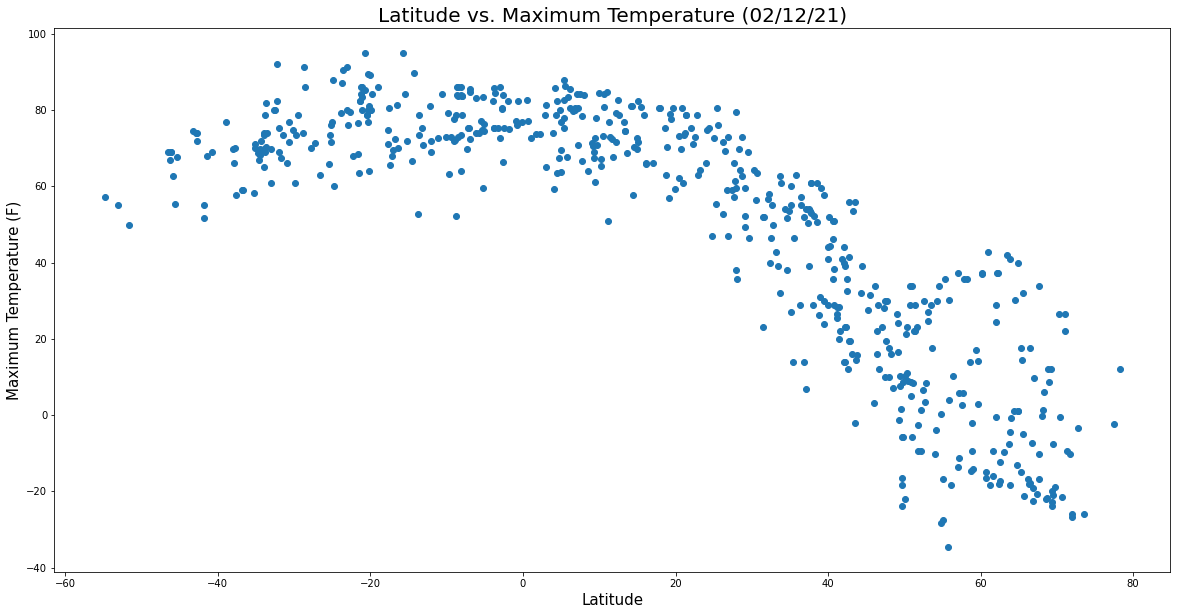

In [10]:
#Assign data to new variables
latitude = city_weather_df["Latitude"]
temperature = city_weather_df["Max Temperature"]

#Plot scatter plot with x and y values
plt.figure(figsize = (20,10))
plt.scatter(latitude, temperature)

#create x- and y-axis labels and a chart title
plt.title(f"City Latitude vs. Maximum Temperature (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperature (F)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Max_Temp_Plot.png")
plt.show()

## Latitude vs. Humidity Plot

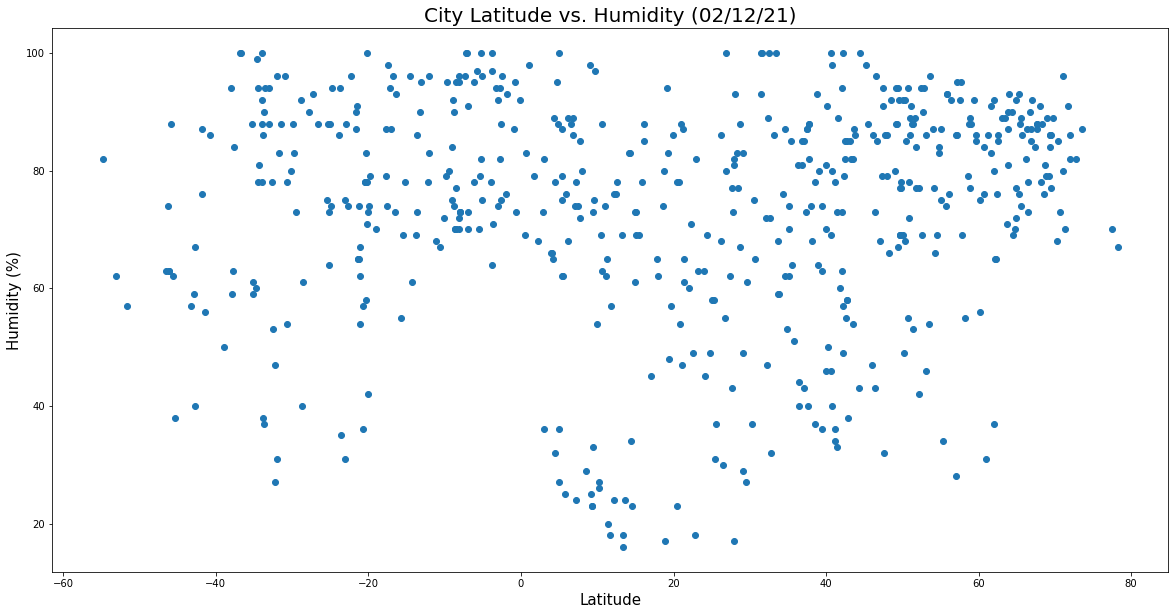

In [12]:
#Assign new variables
latitude = city_weather_df["Latitude"]
humidity = city_weather_df["Humidity"]

#Plot figure
plt.figure(figsize = (20, 10))
plt.scatter(latitude, humidity)

#chart labels and save plot image
plt.title(f"City Latitude vs. Percent Humidity (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Humidity_Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

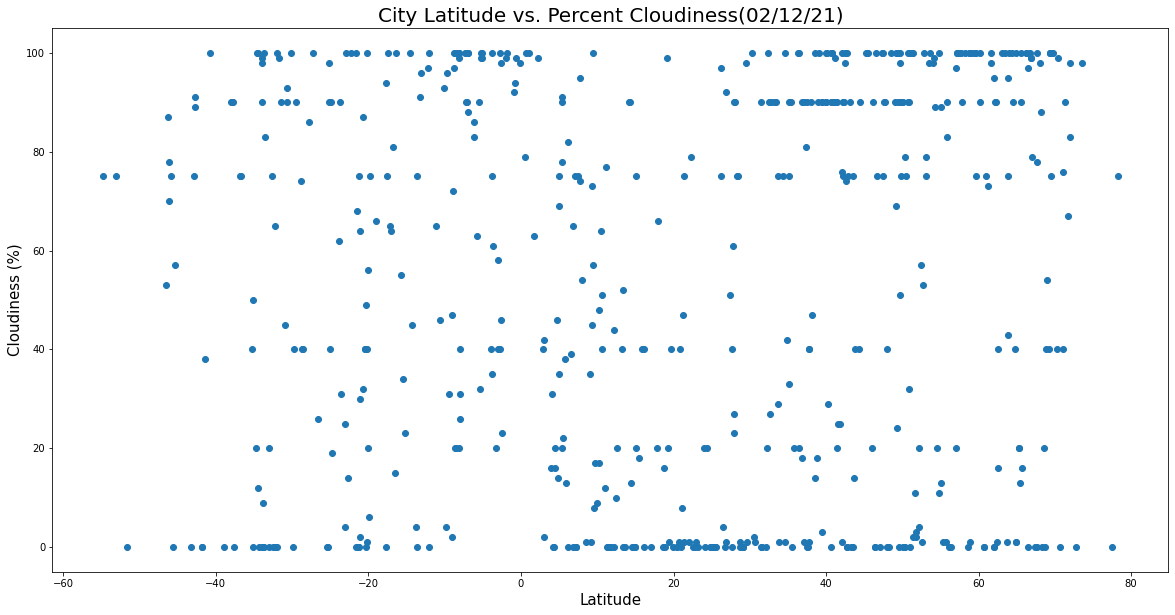

In [13]:
#define variables
latitude = city_weather_df["Latitude"]
cloudiness = city_weather_df["Cloudiness"]

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(latitude, cloudiness)

#designate labels and save as png file
plt.title(f"City Latitude vs. Percent Cloudiness(%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

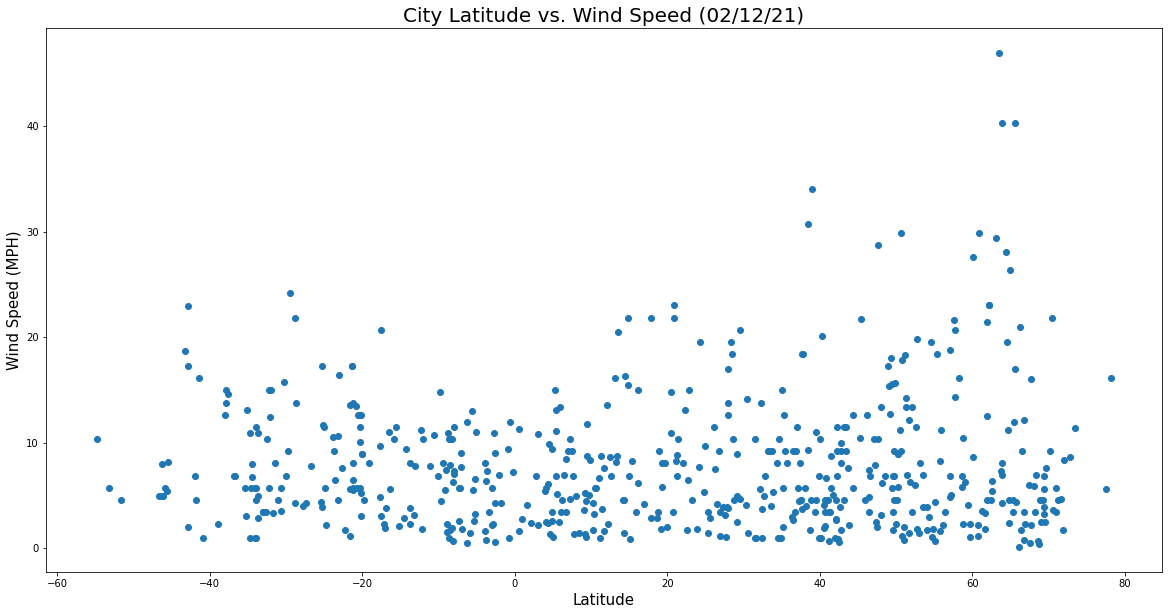

In [14]:
#define variables
latitude = city_weather_df["Latitude"]
wind_speed = city_weather_df["Wind Speed"]

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(latitude, wind_speed)

#assign labels and save to png file
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (MPH)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r=value: -0.8756472325691599


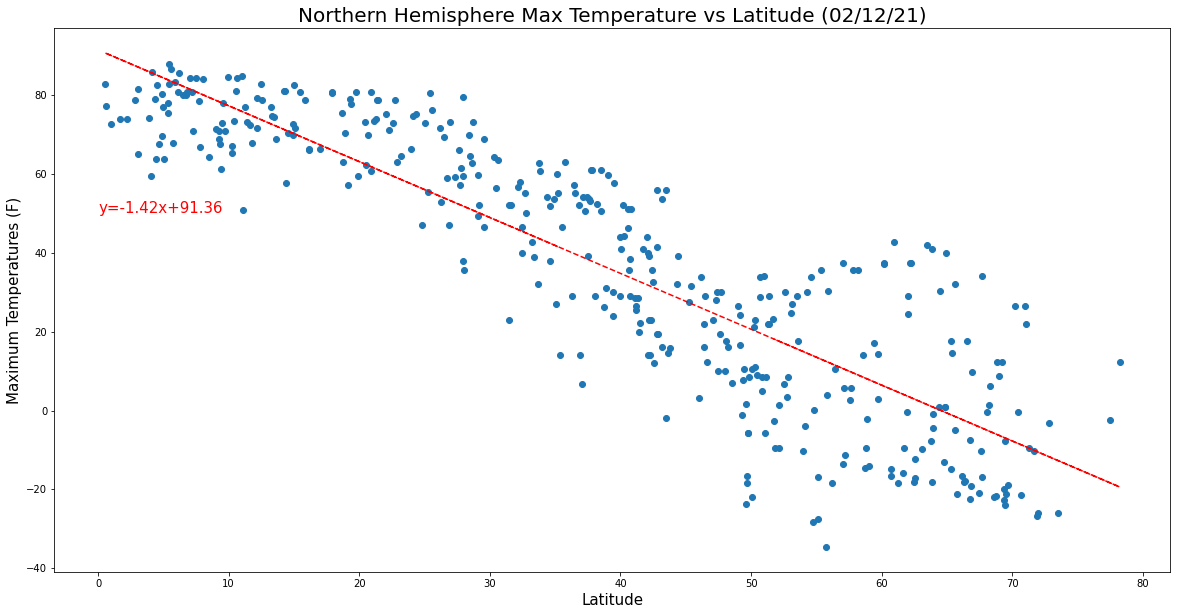

In [18]:
#Use .loc() function to filter for city latitudes above the equator
n_lats = city_weather_df.loc[(city_weather_df["Latitude"] > 0)]

#define variables
north_latitude = n_lats["Latitude"]
north_max_temp = n_lats["Max Temperature"]

#designate linear regression between latitude and max temp
temp_lat_slope, temp_lat_int, temp_lat_r, temp_lat_p, temp_lat_std_err = st.linregress(north_latitude, north_max_temp)

#create slope intercept equation
temp_lat_best_fit = temp_lat_slope * north_latitude + temp_lat_int

#convert to y=mx+b format for graph
north_temp_equation = "y=" + str(round(temp_lat_slope, 2)) + "x+" + str(round(temp_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(north_latitude, north_max_temp)

#Plot linear regression
plt.plot(north_latitude, temp_lat_best_fit, "--", color = "red")

#plot y=mx+b equation on chart
plt.annotate(north_temp_equation, (0, 50), fontsize = 15, color="red")

#assign labels and save to png file
plt.title(f"Northern Hemisphere Max Temperature vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperatures (F)", fontsize = 15)

#include r-value in output
print(f"r=value: {temp_lat_r}")

plt.savefig("../Images/North_Hem_Max_Temp_vs_Lat_Plot.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.4143620997892093


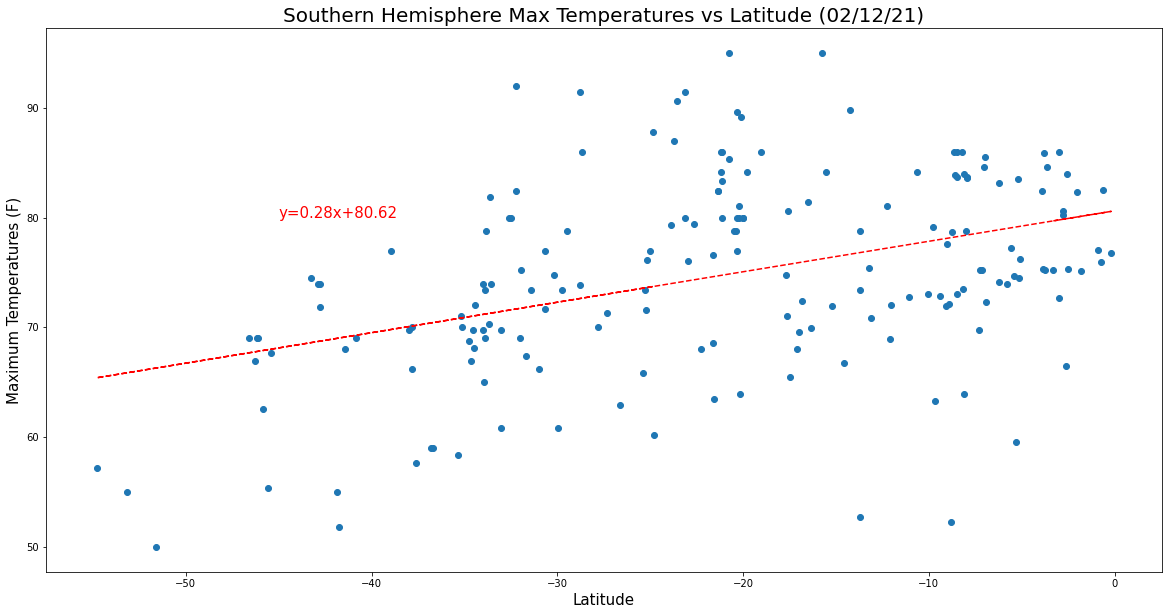

In [22]:
#.loc() for cities below equator and define variables
s_lats = city_weather_df.loc[city_weather_df["Latitude"] <0]

south_latitude = s_lats["Latitude"]
south_max_temp = s_lats["Max Temperature"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_max_temp)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_max_temp)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-45,80), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Max Temperatures vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperatures (F)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Max_Temp_vs_Lat_Plot.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.3291923821705711


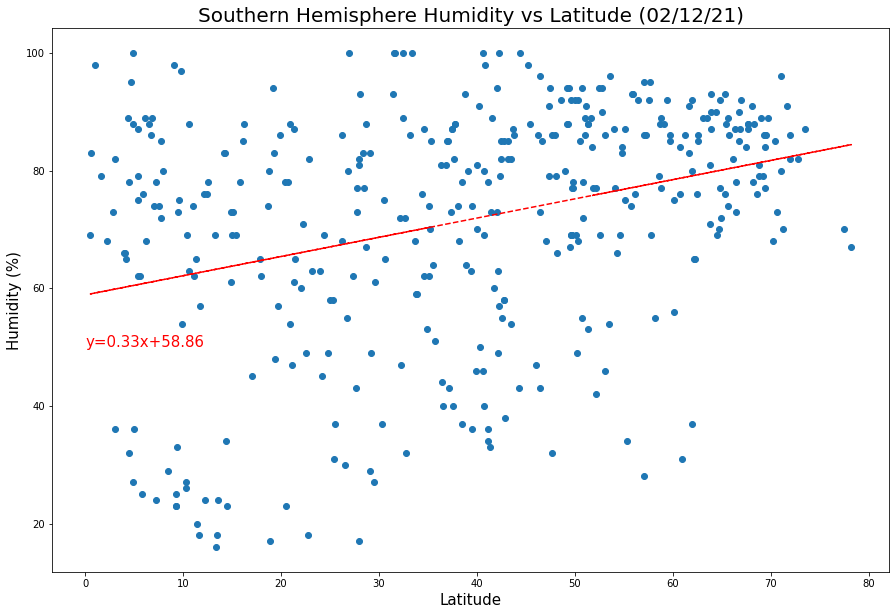

In [29]:
#Define variables
north_latitude = n_lats["Latitude"]
north_humidity = n_lats["Humidity"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_humidity)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_humidity)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (0,50), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Humidity vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Humidity_vs_Lat_Plot.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.29553998411260834


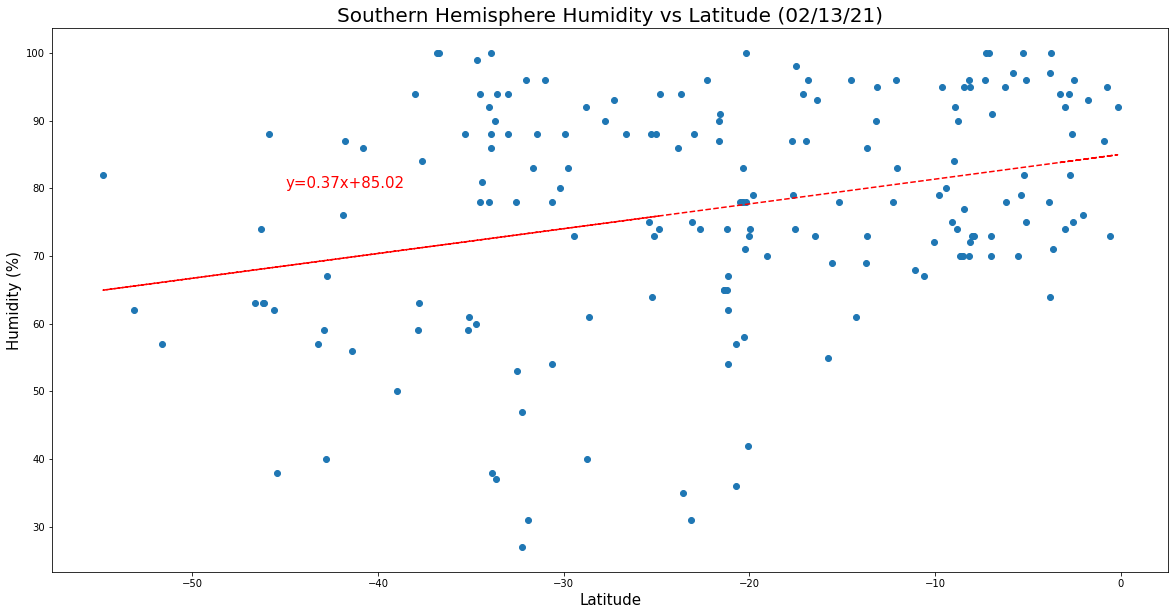

In [46]:
#Define variables
south_latitude = s_lats["Latitude"]
south_humidity = s_lats["Humidity"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_humidity)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_humidity)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-45,80), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Humidity vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Humidity_vs_Lat_Plot.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.2721577066824246


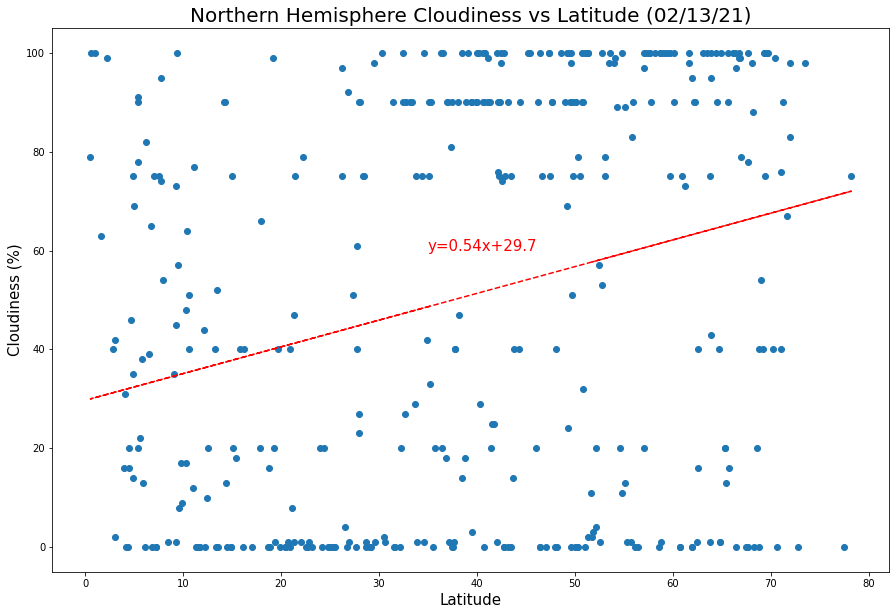

In [34]:
#Define variables
north_latitude = n_lats["Latitude"]
north_cloudiness = n_lats["Cloudiness"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_cloudiness)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_cloudiness)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (35,60), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Northern Hemisphere Cloudiness vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Cloud_vs_Lat_Plot.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.19156645655474325


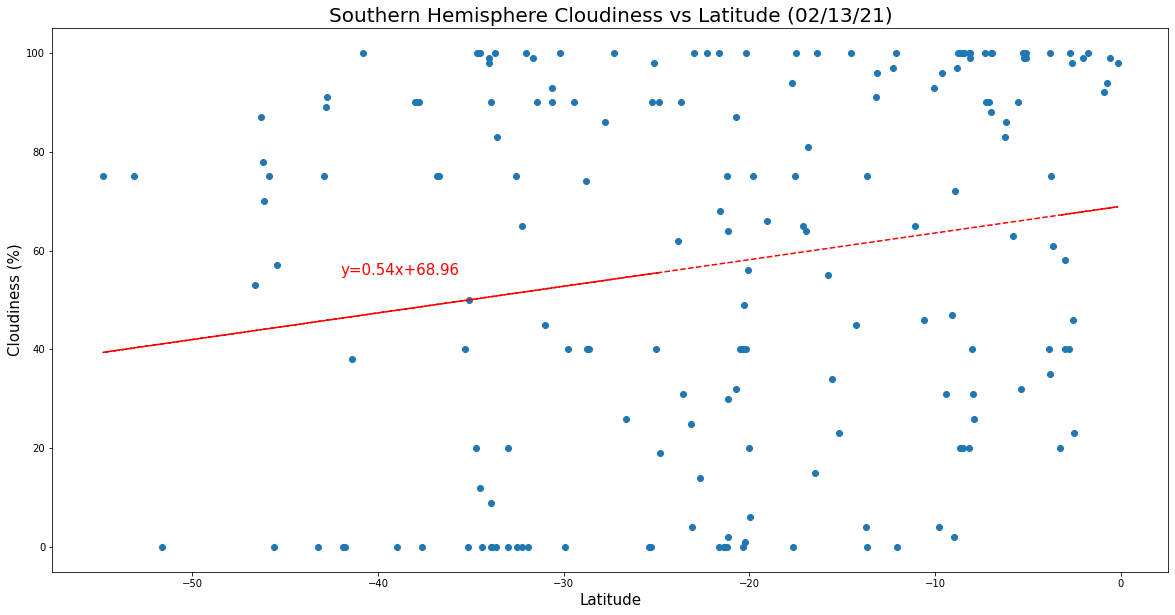

In [37]:
#Define variables
south_latitude = s_lats["Latitude"]
south_cloudiness = s_lats["Cloudiness"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_cloudiness)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_cloudiness)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-42,55), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Cloudiness vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Cloud_vs_Lat_Plot.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.1291835201167542


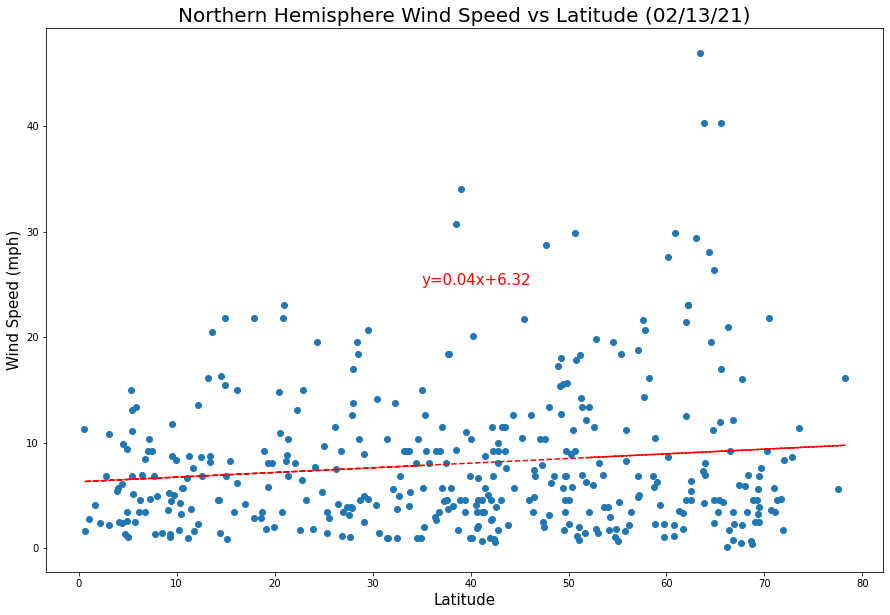

In [40]:
#Define variables
north_latitude = n_lats["Latitude"]
north_wind_speed = n_lats["Wind Speed"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_wind_speed)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_wind_speed)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (35,25), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Northern Hemisphere Wind Speed vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Wind_vs_Lat_Plot.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.17350770406070565


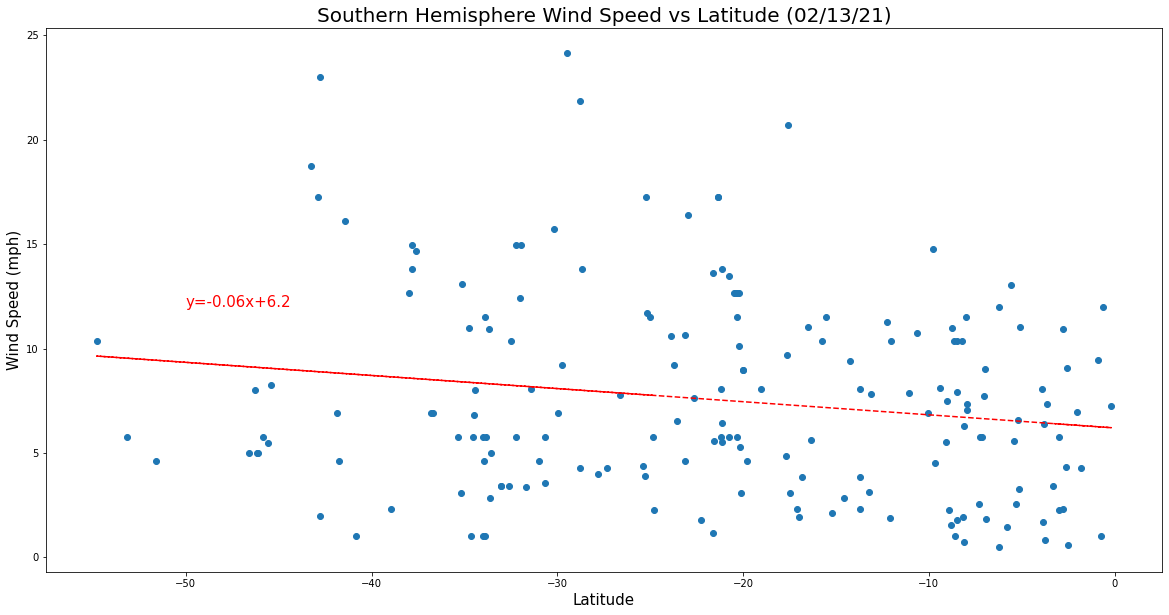

In [42]:
#Define variables
south_latitude = s_lats["Latitude"]
south_wind_speed = s_lats["Wind Speed"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_wind_speed)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_wind_speed)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-50,12), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Wind Speed vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Wind_vs_Lat_Plot.png")
plt.show()